#Задание.

1)Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

2)Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

3)Разделите данные на выборку для обучения и тестирования

4)Постройте модель LDA

5)Визуализируйте предсказания для тестовой выборки и центры классов

6)Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

7)Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
iris = load_iris()

In [58]:
#Загружаем данные 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [61]:
#Разделяем выборку
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)']], variety, random_state=20)

In [62]:
#Обучаем данные
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [63]:
#Делаем прогноз на тестовой выборке
LDA.predict(X_test)

array([0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0])

In [64]:
#Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, LDA.predict(X_test)]).T
result

,0,1
0,0,0
1,1,1
2,1,2
3,2,2
4,1,1
5,1,1
6,2,2
7,0,0
8,2,2
9,0,0


In [69]:
#Расчёт точности 
accuracy_score(y_test, LDA.predict(X_test))

0.7631578947368421

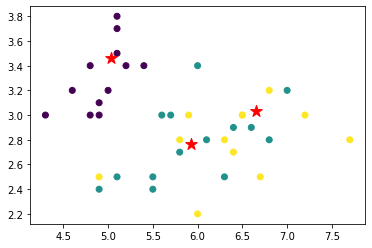

In [84]:
#Визуализация тестовой выборки с центроидами
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(LDA.means_[:, 0], LDA.means_[:, 1], c='r', s=150, marker='*')

##Работа с кластерами

In [85]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters=3)
clusters =kmeans.fit_predict(X_test)
clusters

array([0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0])

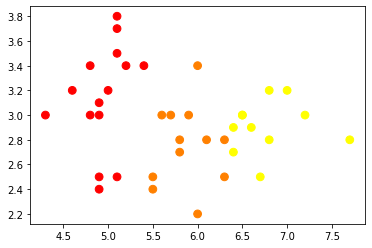

In [94]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], cmap='autumn', c=clusters, s=60)